# ElasticNet Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('dataset.csv')
df = df[df['Position'] != 'Goalkeeper']
df = df.drop('index', axis = 1)
df = df.drop('Minutes', axis = 1)
df

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
0,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,75,...,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,Bundesliga,64000000.0
1,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,86,...,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,Premier League,55000000.0
2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,132,...,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,Serie A,55000000.0
3,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,77,...,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,La Liga,50000000.0
4,Alejandro Balde,18,33,30,1.0,6.0,0.0,4.0,0.0,19,...,25.0,12,54.0,17.0,1.0,FC Barcelona,Defender,Spain,La Liga,46000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,Carlos Soler,25,3,3,1.0,0.0,1.0,0.0,0.0,4,...,1.0,0,2.0,2.0,0.0,Paris Saint-Germain,midfield,Spain,Ligue 1,-25000000.0
1553,Arnaut Danjuma,25,10,6,2.0,0.0,1.0,0.0,0.0,11,...,0.0,0,3.0,1.0,1.0,Tottenham Hotspur,Attack,Netherlands,Premier League,-25000000.0
1554,Jadon Sancho,22,26,21,6.0,3.0,0.0,0.0,0.0,21,...,25.0,7,23.0,6.0,0.0,Manchester United,Attack,England,Premier League,-30000000.0
1555,Romelu Lukaku,29,25,19,10.0,6.0,2.0,1.0,0.0,49,...,3.0,0,3.0,16.0,0.0,Inter Milan,Attack,Belgium,Serie A,-30000000.0


# Attackers

In [3]:
attacker = df[df['Position'] == 'Attack']
attacker.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
0,Randal Kolo Muani,23,32,31,15.0,11.0,2.0,6.0,1.0,75,...,19.0,3,17.0,13.0,0.0,Eintracht Frankfurt,Attack,France,Bundesliga,64000000.0
1,Bukayo Saka,20,38,37,14.0,11.0,2.0,6.0,0.0,86,...,38.0,14,77.0,19.0,0.0,Arsenal FC,Attack,England,Premier League,55000000.0
2,Victor Osimhen,23,32,30,26.0,4.0,2.0,4.0,0.0,132,...,6.0,6,16.0,29.0,0.0,SSC Napoli,Attack,Nigeria,Serie A,55000000.0
3,Vinicius Junior,22,33,32,10.0,9.0,0.0,10.0,1.0,77,...,24.0,6,36.0,1.0,0.0,Real Madrid,Attack,Brazil,La Liga,50000000.0
7,Rodrygo,21,34,25,9.0,8.0,1.0,4.0,0.0,97,...,23.0,8,25.0,5.0,0.0,Real Madrid,Attack,Brazil,La Liga,40000000.0


In [4]:
attacker.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [5]:
X = attacker.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = attacker['Value']

# Model Training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [8]:
enet = ElasticNet()
enet.fit(X_train, y_train)

ElasticNet()

In [9]:
cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

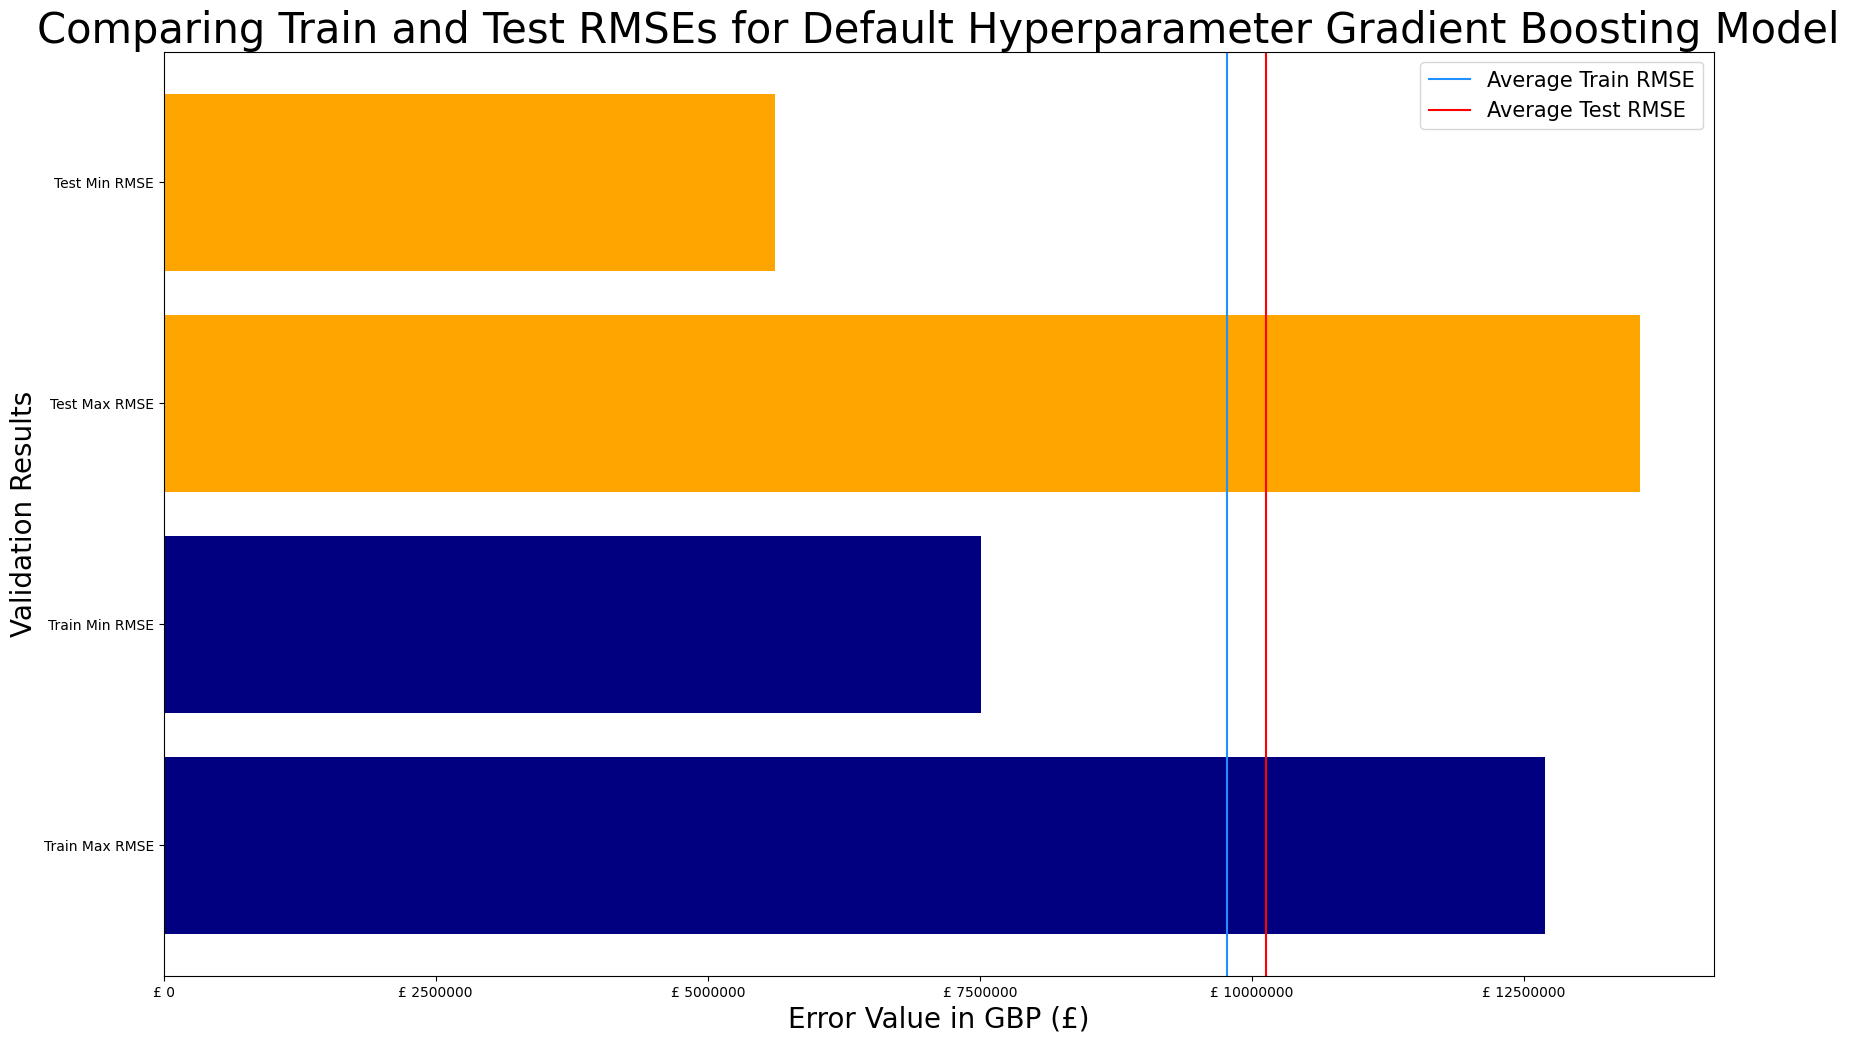

In [10]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [11]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9770565.99,12687430.43,7506876.39
1,Test,10131644.53,13561937.01,5619774.03


In [12]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.1412793398216795
Test R-squared: 0.21634273212807242
Train Adjusted R-squared: 0.09864781768516717
Test Adjusted R-squared: 0.08573318748275105


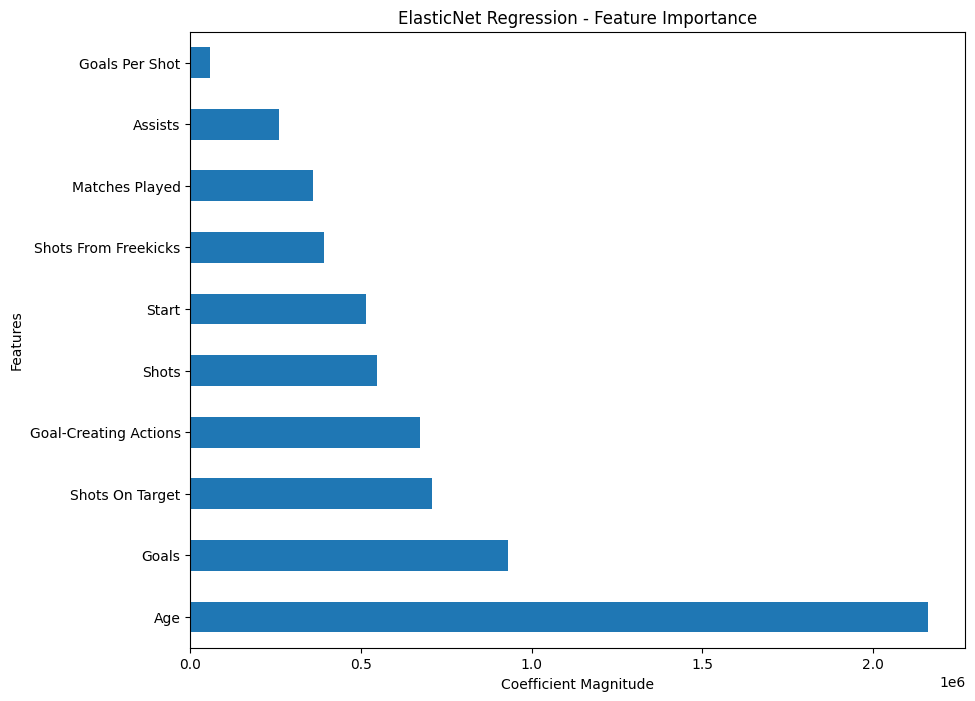

In [13]:
feature_importance = pd.Series(enet.coef_, index=X.columns)
top_features = feature_importance.abs().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_features.plot(kind='barh')
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
ax.set_title('ElasticNet Regression - Feature Importance')

plt.show()

In [14]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                    Variable        VIF
0                        Age  20.822507
1             Matches Played  27.920000
2                      Start  18.284432
3                      Goals  32.611421
4                    Assists   8.327668
5             Penalties Made   3.566687
6                      Shots  69.679459
7            Shots On Target  74.931448
8          Shots On Target %  18.148572
9             Goals Per Shot  24.965827
10  Goals Per Shot On Target  16.575986
11     Average Shot Distance  19.819202
12      Shots From Freekicks   1.728798
13     Goal-Creating Actions  13.931633


<Axes: >

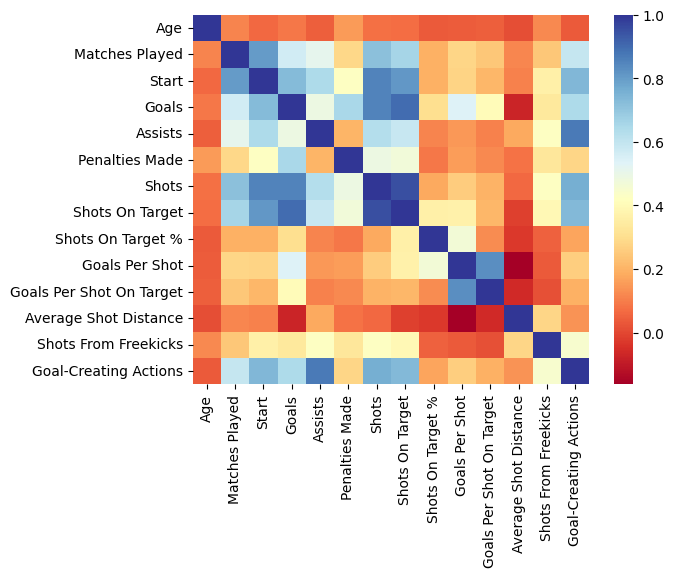

In [15]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot = False, cmap='RdYlBu')

In [16]:
X = X.drop(['Matches Played', 'Start', 'Shots', 'Shots On Target', 'Penalties Made', 'Goals Per Shot On Target'], axis=1)

In [17]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                Variable        VIF
0                    Age  17.991304
1                  Goals   4.632294
2                Assists   8.194445
3      Shots On Target %  10.040151
4         Goals Per Shot   5.099001
5  Average Shot Distance  16.399129
6   Shots From Freekicks   1.563046
7  Goal-Creating Actions  12.236242


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [19]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

In [20]:
pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [21]:
enet = ElasticNet()
enet.fit(X_train, y_train)

ElasticNet()

In [22]:
cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

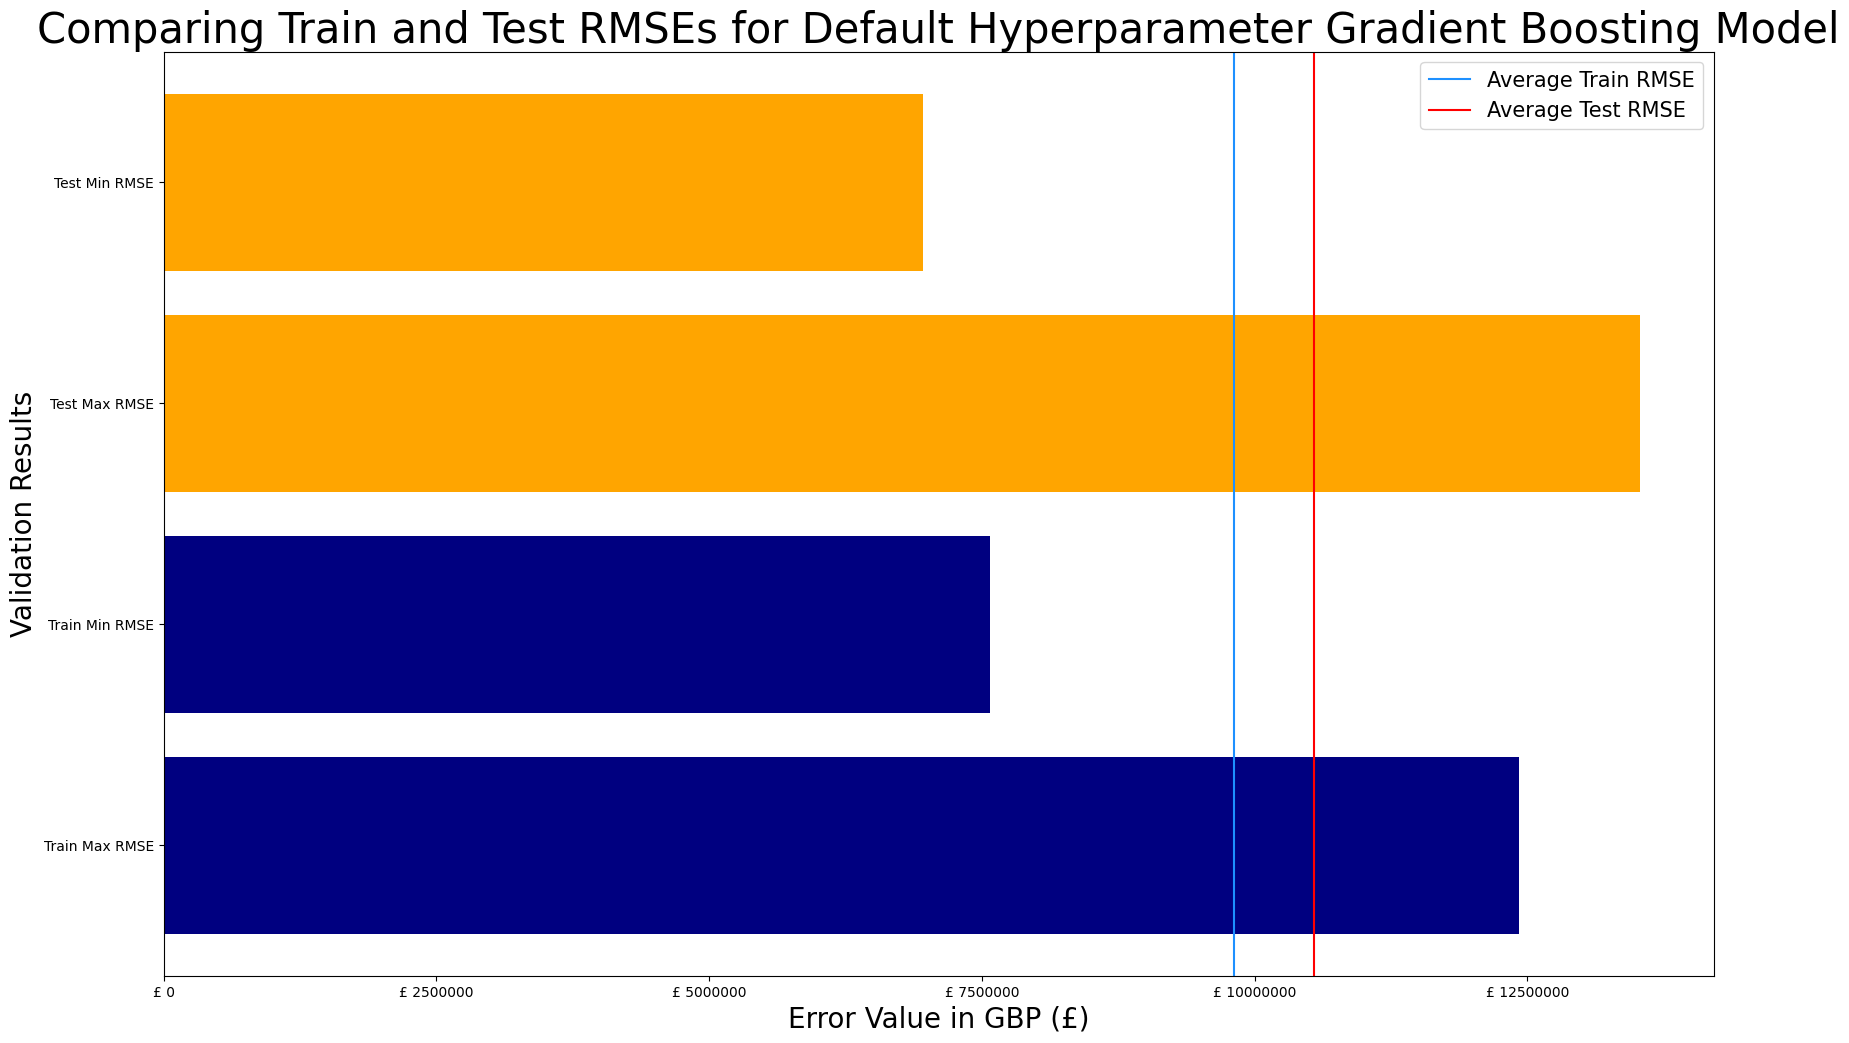

In [23]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [24]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9815152.05,12426036.45,7570676.08
1,Test,10547009.97,13529114.03,6957900.77


In [25]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.12621000490072531
Test R-squared: 0.18218510715702574
Train Adjusted R-squared: 0.10193806059241217
Test Adjusted R-squared: 0.10949045001542812


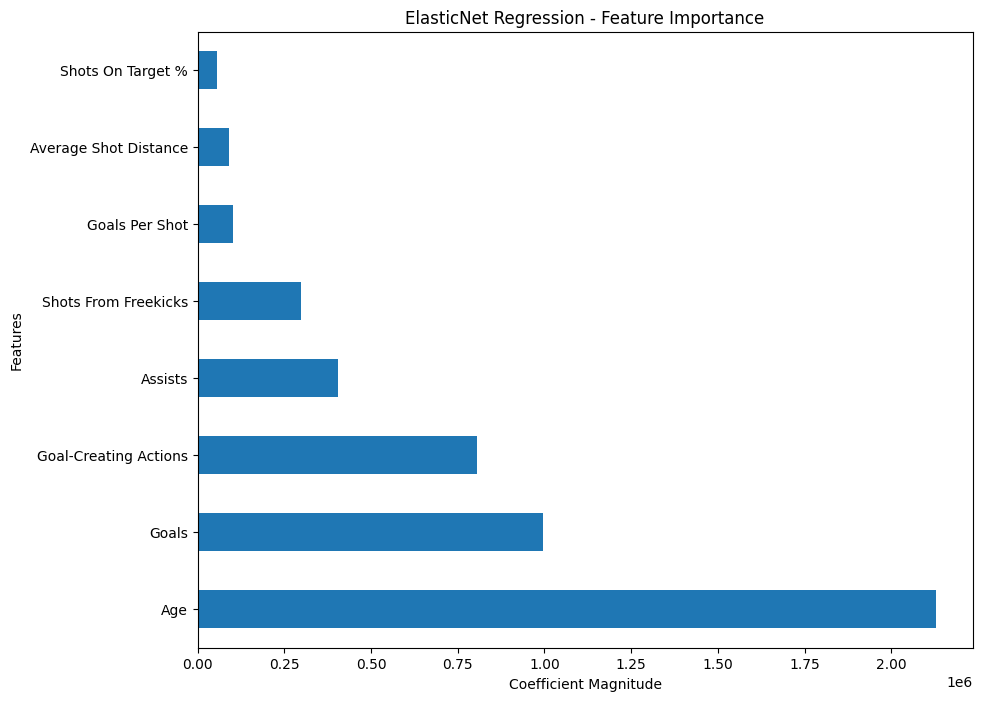

In [26]:
feature_importance = pd.Series(enet.coef_, index=X.columns)
top_features = feature_importance.abs().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_features.plot(kind='barh')
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
ax.set_title('ElasticNet Regression - Feature Importance')

plt.show()

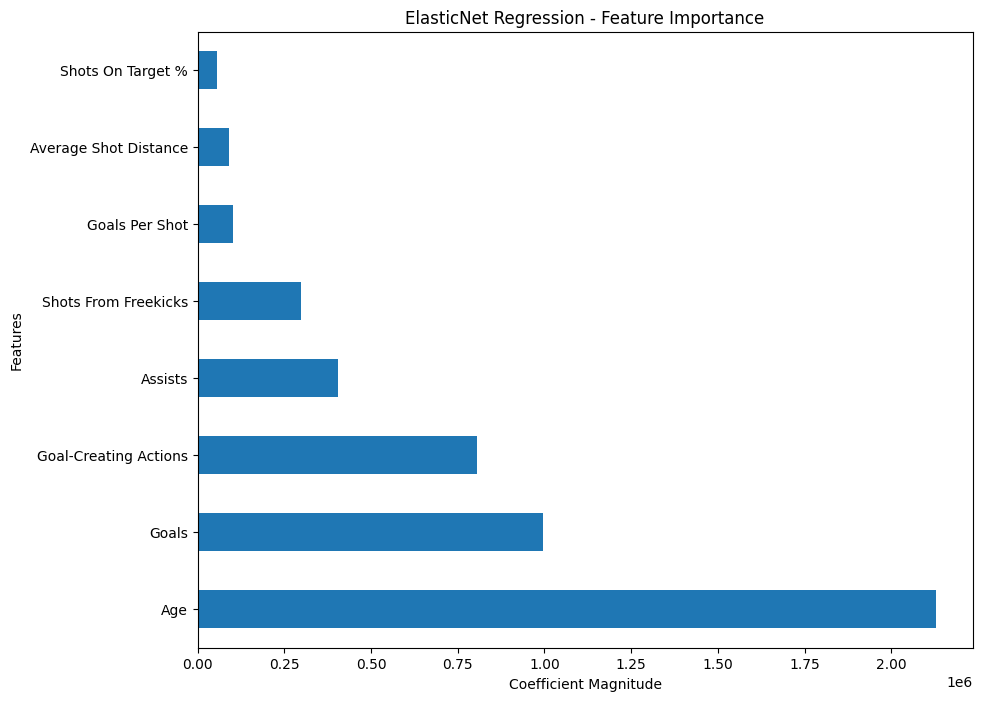

In [27]:
feature_importance = pd.Series(enet.coef_, index=X.columns)
top_features = feature_importance.abs().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_features.plot(kind='barh')
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
ax.set_title('ElasticNet Regression - Feature Importance')

plt.show()

# Tuning

In [28]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
    'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1],
}

grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1,

/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+16, tolerance: 2.932e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.134e+16, tolerance: 2.563e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [29]:
grid_search.best_params_

{'alpha': 1.0, 'l1_ratio': 0.8}

In [30]:
param_values = list((grid_search.best_params_).values())
param_values

[1.0, 0.8]

In [31]:
enet_Grid = ElasticNet(alpha=param_values[0],
                      l1_ratio=param_values[1])

enet_Grid.fit(X_train,y_train)

ElasticNet(l1_ratio=0.8)

In [32]:
cross_val_train = cross_val_score(enet_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_att = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_att.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_att.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

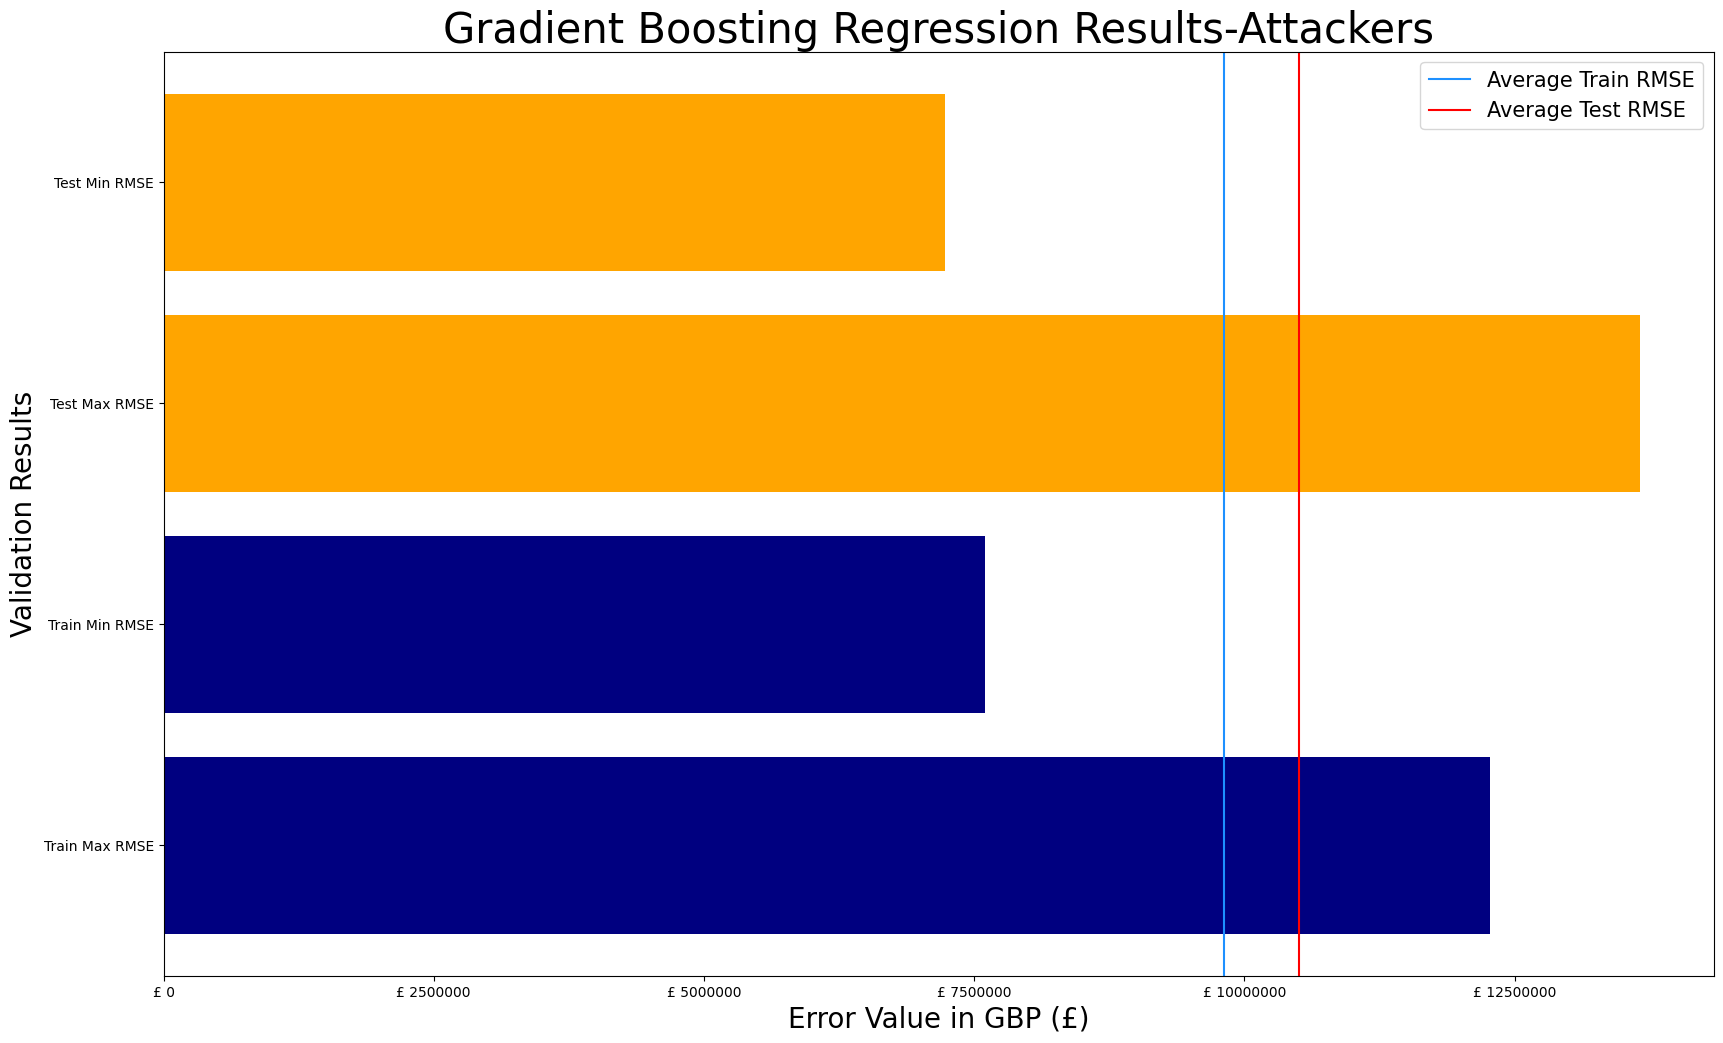

In [33]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Gradient Boosting Regression Results-Attackers',fontsize=30)
ax.legend(fontsize=15)

In [34]:
results_att

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,9815411.04,12274648.69,7604295.11
1,Test,10508535.16,13657223.28,7228458.58


In [35]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet_Grid.predict(X_train)
y_test_pred = enet_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.1385215788051296
Test R-squared: 0.20954670729424496
Train Adjusted R-squared: 0.11459162266082779
Test Adjusted R-squared: 0.1392841923870668


# Midfielders

In [36]:
midfielder = df[df['Position'] == 'midfield']
midfielder.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
5,Jamal Musiala,19,33,26,12.0,10.0,0.0,1.0,0.0,66,...,30.0,19,53.0,3.0,0.0,Bayern Munich,midfield,Germany,Bundesliga,45000000.0
6,Martin Odegaard,23,37,37,15.0,7.0,0.0,4.0,0.0,93,...,20.0,6,42.0,12.0,1.0,Arsenal FC,midfield,Norway,Premier League,45000000.0
8,Jude Bellingham,19,31,30,8.0,4.0,1.0,8.0,0.0,66,...,51.0,35,111.0,30.0,0.0,Borussia Dortmund,midfield,England,Bundesliga,40000000.0
12,Amadou Onana,20,33,29,1.0,2.0,0.0,9.0,0.0,34,...,25.0,37,109.0,39.0,0.0,Everton FC,midfield,Belgium,Premier League,35000000.0
13,Gavi,17,36,30,2.0,4.0,0.0,10.0,0.0,28,...,32.0,18,65.0,22.0,0.0,FC Barcelona,midfield,Spain,La Liga,30000000.0


In [37]:
midfielder.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [38]:
X = midfielder.drop(['Player','Yellow Cards', 'Red Cards', 'Value', 'Nation', 'Club', 'Position','Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance', 
        'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors'],axis=1)
y = midfielder['Value']

In [39]:
X.dtypes

Age                               int64
Matches Played                    int64
Start                             int64
Goals                           float64
Assists                         float64
Penalties Made                  float64
Shots From Freekicks            float64
Passes Completed                float64
Passes                          float64
Pass Completion %               float64
Total Passing Distance          float64
Progressive Passing Distance    float64
Shot-Creating Actions           float64
Shot-Creating Actions/90        float64
SCA Pass Live                   float64
SCA Pass Dead                   float64
SCA Take-ons                    float64
SCA Shots                       float64
SCA Fouls                       float64
SCA Defense                     float64
Goal-Creating Actions           float64
Goal-Creating Actions/90        float64
Goal Pass Live                  float64
Goal Pass Dead                  float64
Goal Take-ons                   float64


# Model Training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

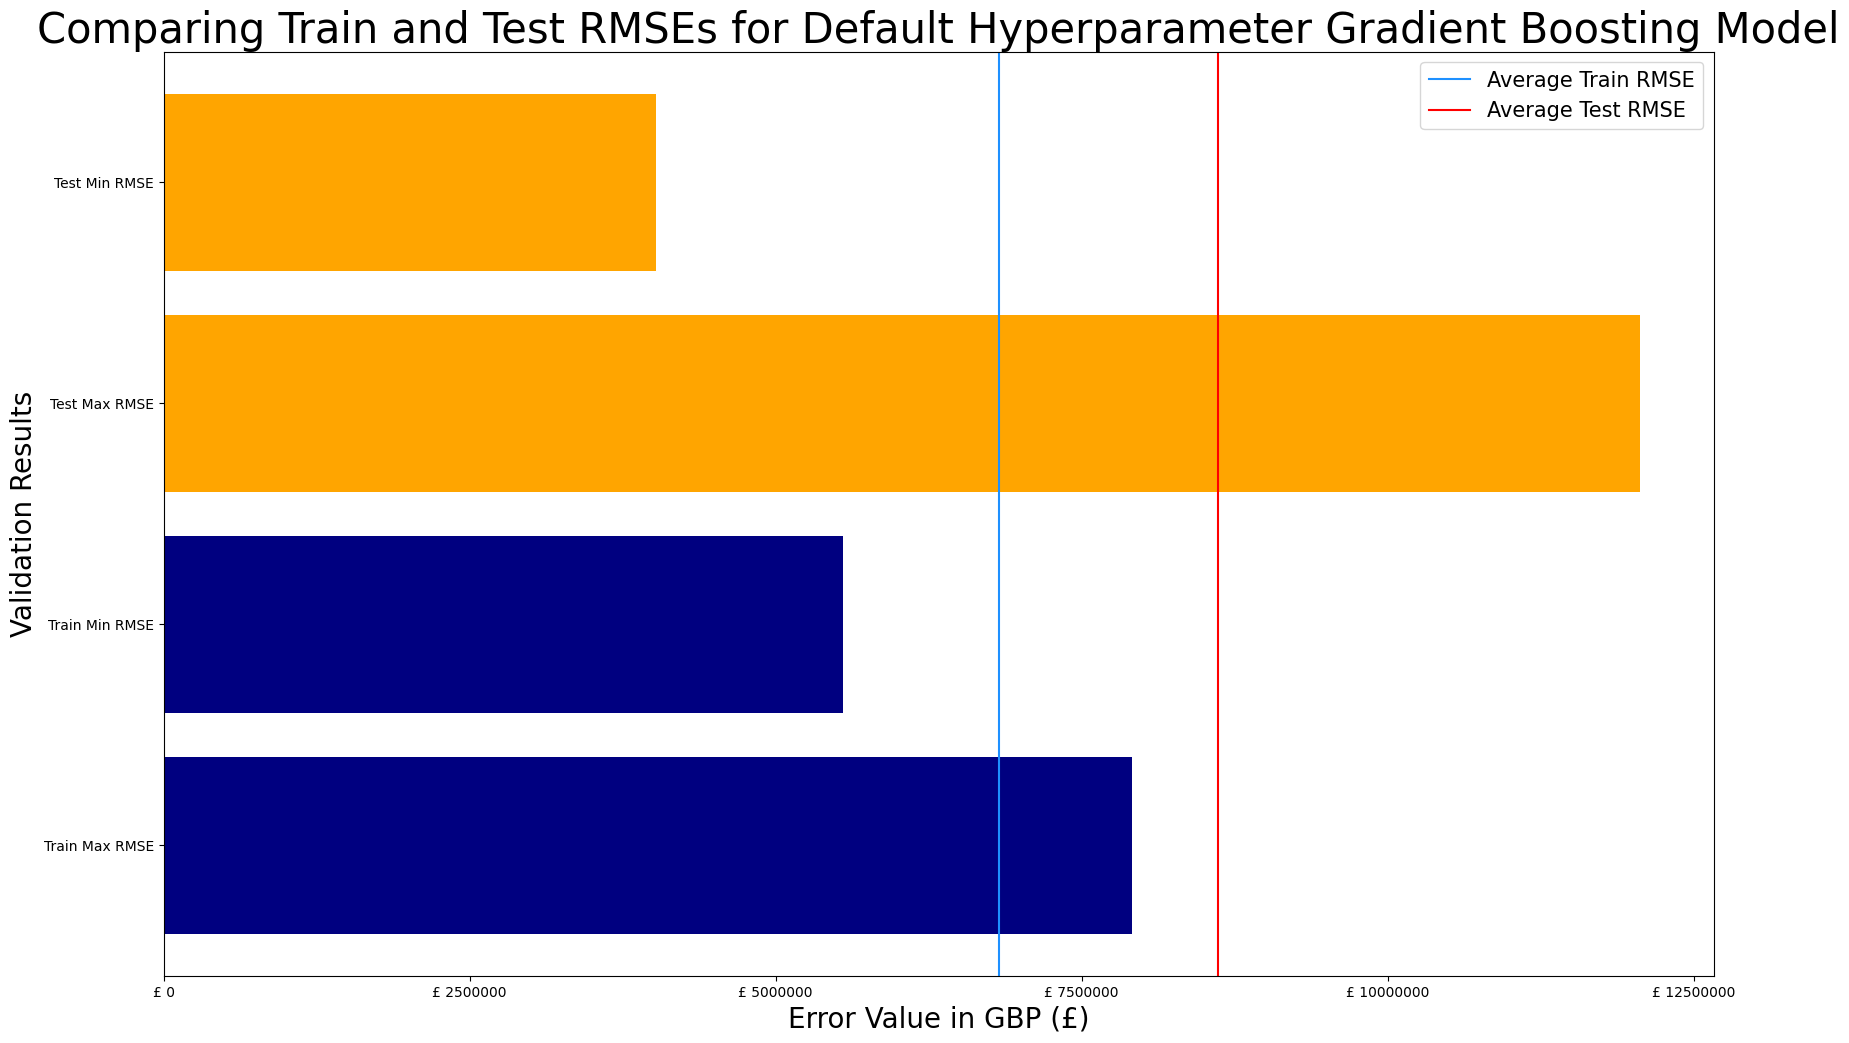

In [41]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

enet = ElasticNet()
enet.fit(X_train, y_train)

cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [42]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6827208.78,7907950.48,5550689.44
1,Test,8613203.65,12058511.61,4019923.68


In [43]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.38222516957229236
Test R-squared: 0.2182030924777485
Train Adjusted R-squared: 0.3294882938040734
Test Adjusted R-squared: -0.02234980214448279


In [44]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable         VIF
0                            Age   40.706088
1                 Matches Played   37.618804
2                          Start   44.956387
3                          Goals    4.929973
4                        Assists    8.183322
5                 Penalties Made    1.708489
6           Shots From Freekicks    3.533285
7               Passes Completed  719.981702
8                         Passes  986.880560
9              Pass Completion %   54.128758
10        Total Passing Distance  273.860701
11  Progressive Passing Distance   76.310851
12         Shot-Creating Actions         inf
13      Shot-Creating Actions/90   32.795987
14                 SCA Pass Live         inf
15                 SCA Pass Dead         inf
16                  SCA Take-ons         inf
17                     SCA Shots         inf
18                     SCA Fouls         inf
19                   SCA Defense         inf
20         Goal-Creating Actions         inf
21      Go

/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [45]:
X = X.drop(['Matches Played', 'Start','Passes','Penalties Made','Passes Completed', 'Shot-Creating Actions', 'Goal-Creating Actions', 'SCA Pass Live', 'SCA Pass Dead', 'SCA Take-ons',
'SCA Shots', 'SCA Fouls', 'SCA Defense','Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Goal Pass Live', 'Progressive Passing Distance',
'Goal Defense'], axis=1)

In [46]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                   Variable        VIF
0                       Age  32.626033
1                     Goals   2.792248
2                   Assists   3.962603
3      Shots From Freekicks   1.960066
4         Pass Completion %  39.257838
5    Total Passing Distance   4.186181
6  Shot-Creating Actions/90  12.471274
7  Goal-Creating Actions/90   5.553311


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

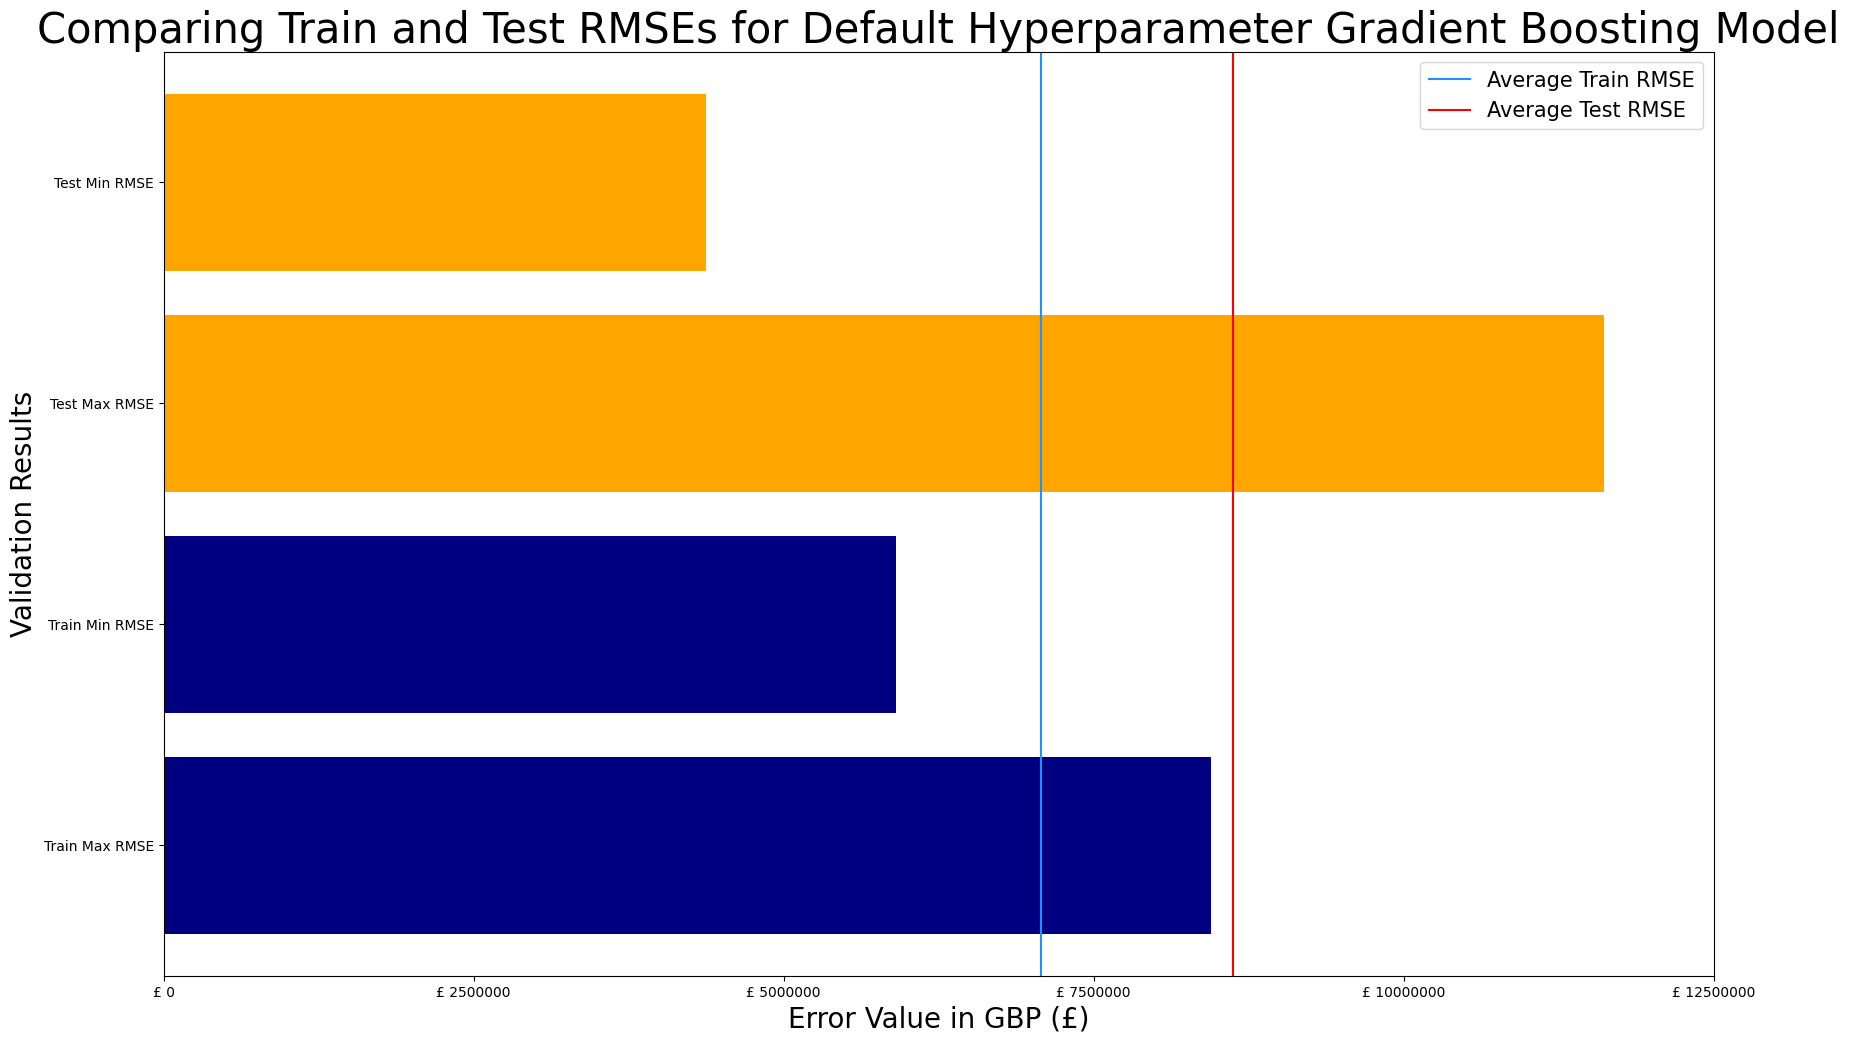

In [48]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

enet = ElasticNet()
enet.fit(X_train, y_train)

cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [49]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,7075581.24,8449528.81,5910827.82
1,Test,8622289.62,11616888.87,4372699.58


In [50]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.2805388813440328
Test R-squared: 0.20322110878287925
Train Adjusted R-squared: 0.2639995452829761
Test Adjusted R-squared: 0.1457956031095733


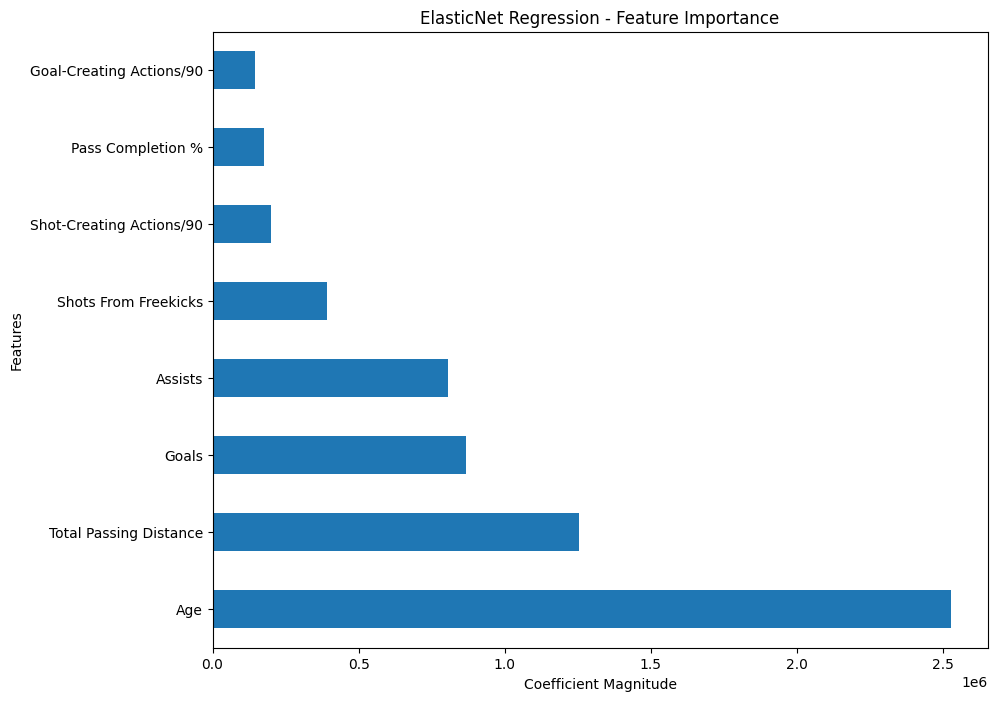

In [51]:
feature_importance = pd.Series(enet.coef_, index=X.columns)
top_features = feature_importance.abs().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_features.plot(kind='barh')
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
ax.set_title('ElasticNet Regression - Feature Importance')

plt.show()

# Tuning

In [52]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
    'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1],
}

grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1,

/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.297e+15, tolerance: 1.711e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.216e+15, tolerance: 2.111e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [53]:
grid_search.best_params_

{'alpha': 0.1, 'l1_ratio': 0.2}

In [54]:
param_values = list((grid_search.best_params_).values())
param_values

[0.1, 0.2]

In [55]:
enet_Grid = ElasticNet(alpha=param_values[0],
                      l1_ratio=param_values[1])

enet_Grid.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.2)

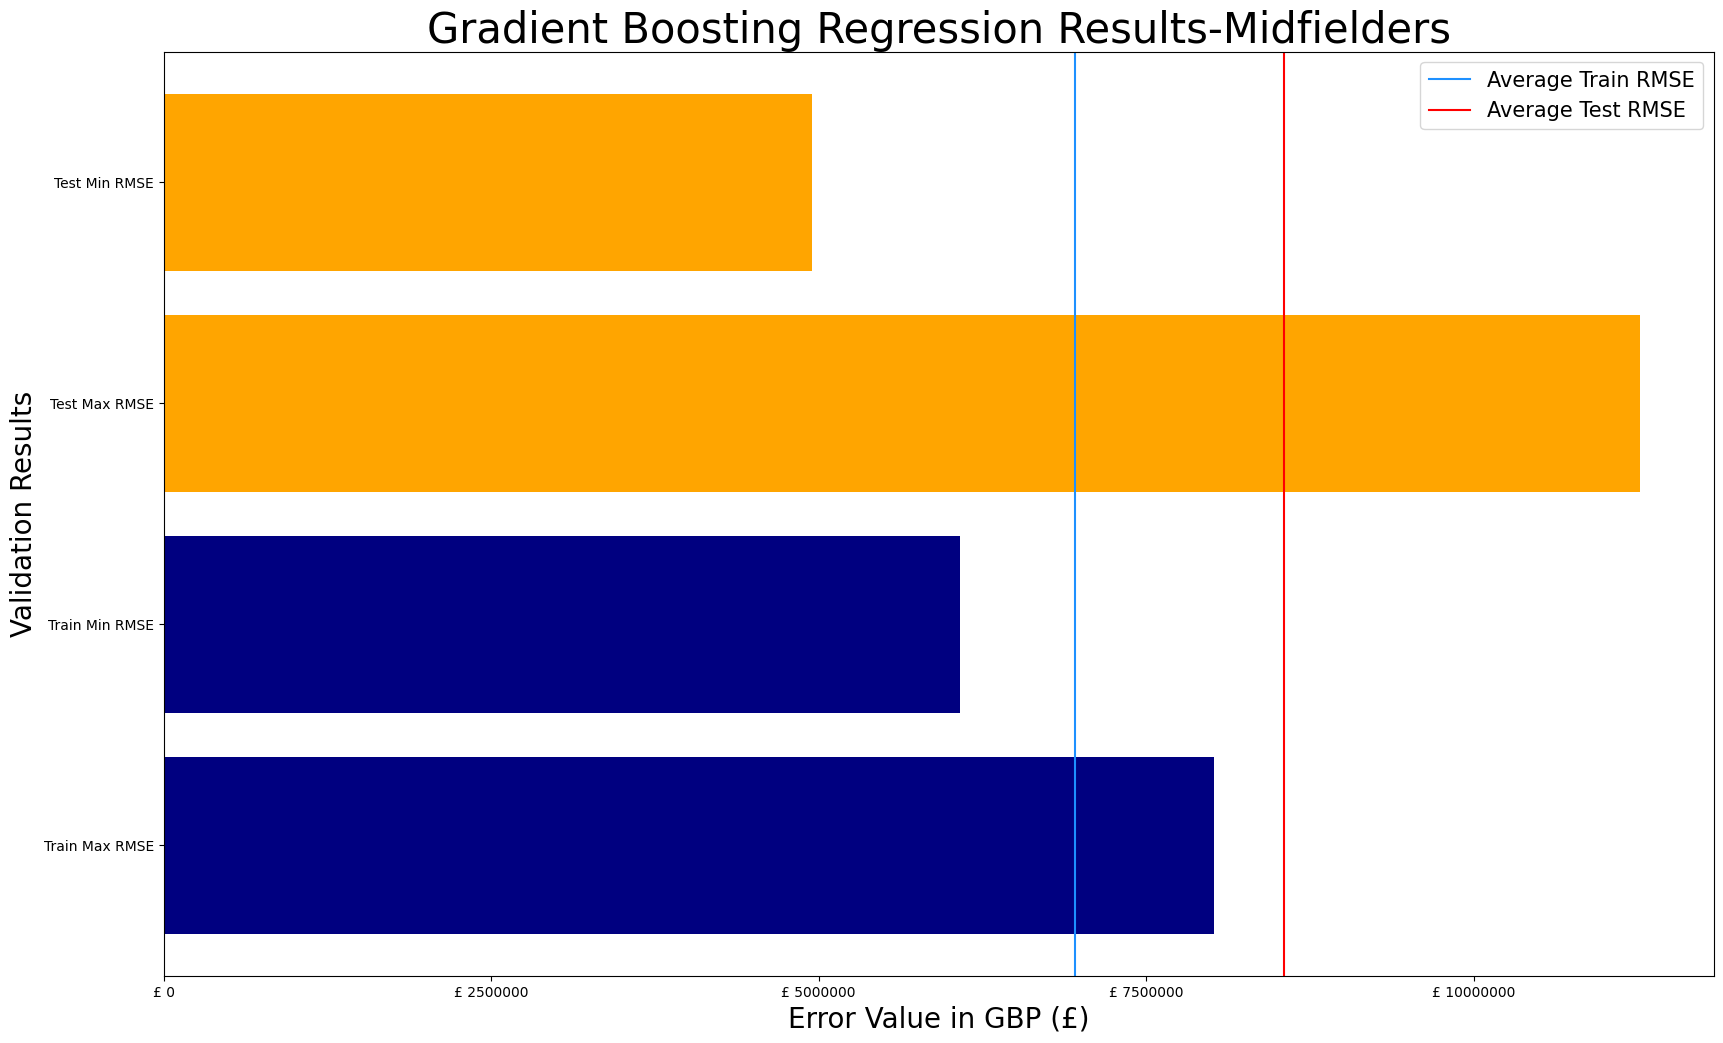

In [56]:
cross_val_train = cross_val_score(enet_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_mid = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_mid.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_mid.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Gradient Boosting Regression Results-Midfielders',fontsize=30)
ax.legend(fontsize=15)

In [57]:
results_mid

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6960703.60,8021840.63,6082271.24
1,Test,8552402.28,11268793.53,4949162.06


In [58]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet_Grid.predict(X_train)
y_test_pred = enet_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.3218232182334184
Test R-squared: 0.22996880503458605
Train Adjusted R-squared: 0.3062329473882097
Test Adjusted R-squared: 0.17447106125329503


# Defenders

In [59]:
defender = df[df['Position'] == 'Defender']
defender.head()

,Player,Age,Matches Played,Start,Goals,Assists,Penalties Made,Yellow Cards,Red Cards,Shots,...,Blocks,Interceptions,Tackles + Interceptions,Clearances,Errors,Club,Position,Nation,League,Value
4,Alejandro Balde,18,33,30,1.0,6.0,0.0,4.0,0.0,19,...,25.0,12,54.0,17.0,1.0,FC Barcelona,Defender,Spain,La Liga,46000000.0
10,Josko Gvardiol,20,30,24,1.0,0.0,0.0,2.0,0.0,14,...,34.0,34,57.0,76.0,1.0,RB Leipzig,Defender,Croatia,Bundesliga,40000000.0
11,William Saliba,21,27,27,2.0,1.0,0.0,4.0,0.0,6,...,13.0,19,53.0,85.0,4.0,Arsenal FC,Defender,France,Premier League,35000000.0
21,Giorgio Scalvini,18,32,29,2.0,2.0,0.0,7.0,0.0,17,...,36.0,56,110.0,57.0,2.0,Atalanta BC,Defender,Italy,Serie A,30000000.0
28,Nuno Mendes,20,23,18,1.0,6.0,0.0,2.0,0.0,10,...,19.0,17,62.0,18.0,0.0,Paris Saint-Germain,Defender,Portugal,Ligue 1,25000000.0


In [60]:
defender.columns

Index(['Player', 'Age', 'Matches Played', 'Start', 'Goals', 'Assists',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance',
       'Progressive Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls',
       'Goal Defense', 'Tackles', 'Tackles Won', 'Challenges',
       'Successful Challenge %', 'Blocks', 'Interceptions',
       'Tackles + Interceptions', 'Clearances', 'Errors', 'Club', 'Position',
       'Nation', 'League', 'Value'],
      dtype='object')

In [61]:
X = defender.drop(['Player', 'Matches Played', 'Start', 'Goals',
       'Penalties Made', 'Yellow Cards', 'Red Cards', 'Shots',
       'Shots On Target', 'Shots On Target %', 'Goals Per Shot',
       'Goals Per Shot On Target', 'Average Shot Distance',
       'Shots From Freekicks', 'Passes Completed', 'Passes',
       'Pass Completion %', 'Total Passing Distance', 'Shot-Creating Actions',
       'Shot-Creating Actions/90', 'SCA Pass Live', 'SCA Pass Dead',
       'SCA Take-ons', 'SCA Shots', 'SCA Fouls', 'SCA Defense',
       'Goal-Creating Actions', 'Goal-Creating Actions/90', 'Goal Pass Live',
       'Goal Pass Dead', 'Goal Take-ons', 'Goal Shots', 'Goal Fouls', 'Position',
       'Nation', 'Value', 'Club'
       ],axis=1)
y = defender['Value']

In [62]:
X.dtypes

Age                               int64
Assists                         float64
Progressive Passing Distance    float64
Goal Defense                    float64
Tackles                         float64
Tackles Won                       int64
Challenges                      float64
Successful Challenge %          float64
Blocks                          float64
Interceptions                     int64
Tackles + Interceptions         float64
Clearances                      float64
Errors                          float64
dtype: object

# Model Training

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

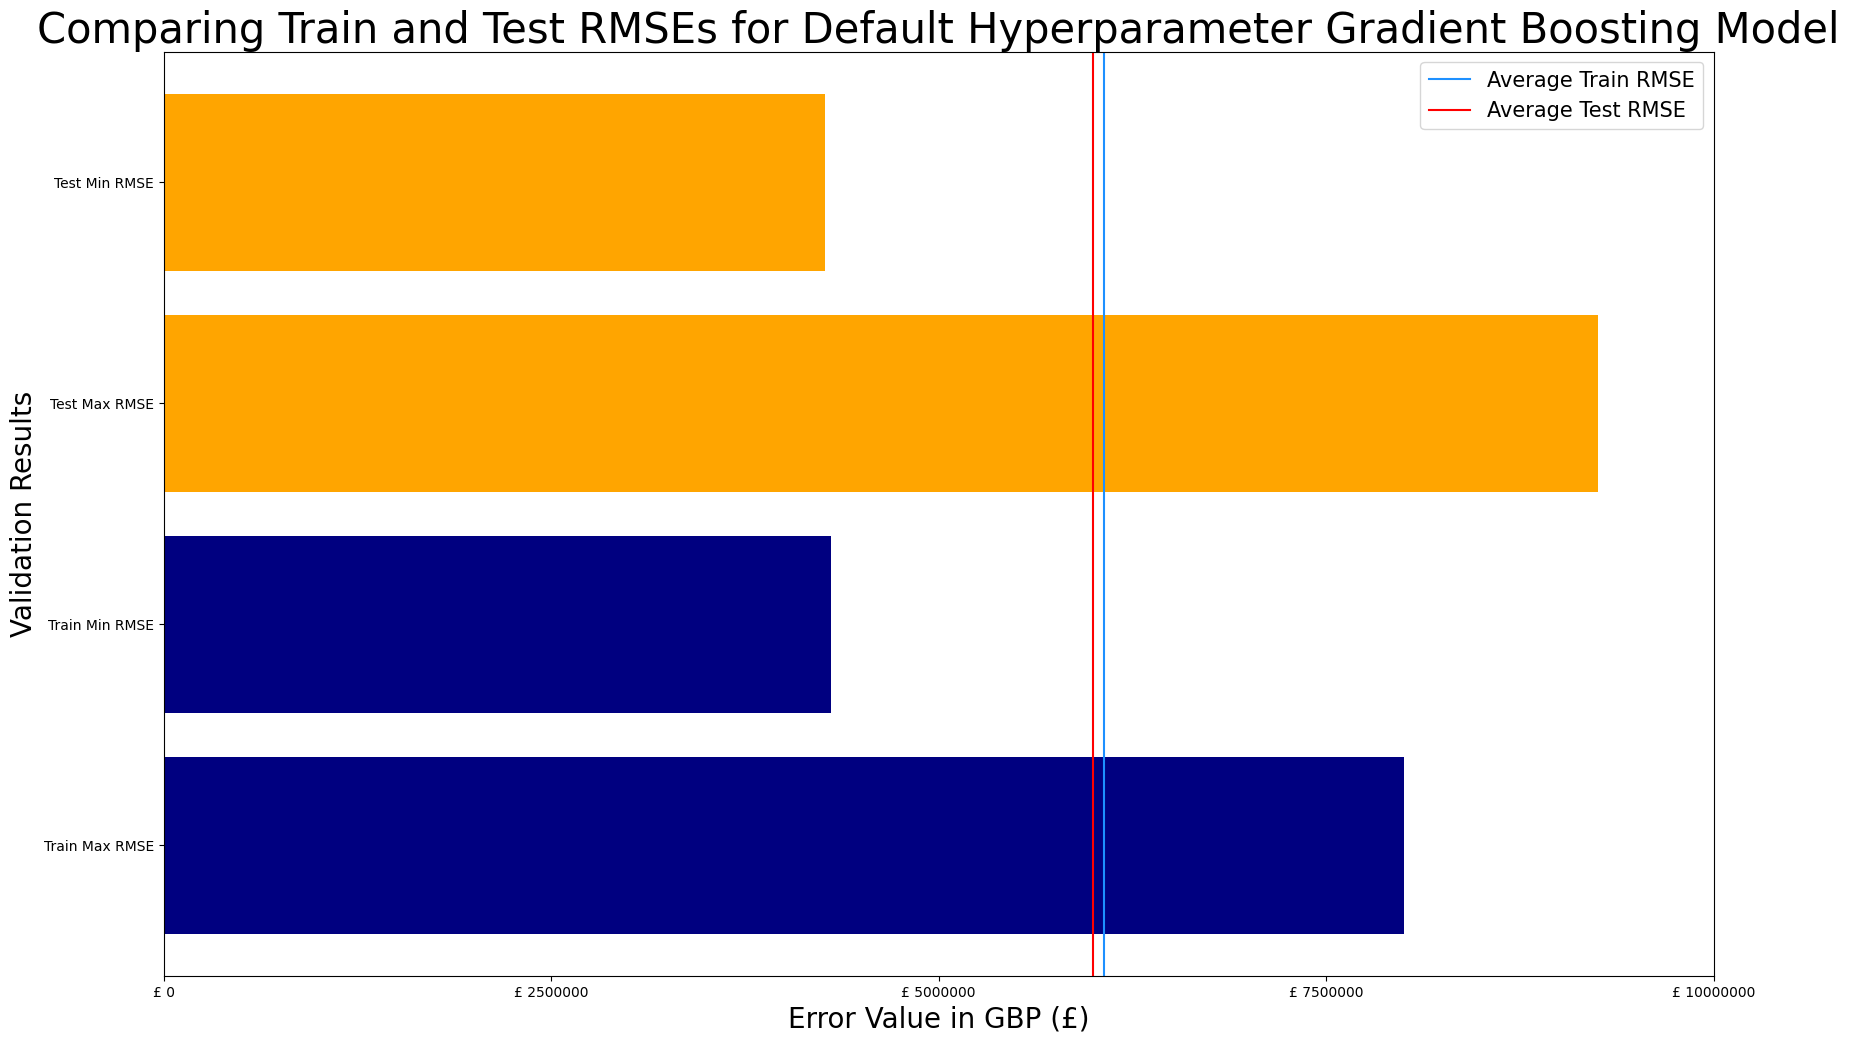

In [64]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

enet = ElasticNet()
enet.fit(X_train, y_train)

cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [65]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,6068524.27,8004492.67,4307324.55
1,Test,5997849.65,9254475.16,4269001.71


In [66]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.13415850207999291
Test R-squared: 0.12407981019868164
Train Adjusted R-squared: 0.10636605893688156
Test Adjusted R-squared: 0.033707092203307476


In [67]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                        Variable        VIF
0                            Age  11.064725
1                        Assists   1.843203
2   Progressive Passing Distance  10.883389
3                   Goal Defense   1.072789
4                        Tackles        inf
5                    Tackles Won  68.258820
6                     Challenges  33.504556
7         Successful Challenge %  11.568720
8                         Blocks  15.610819
9                  Interceptions        inf
10       Tackles + Interceptions        inf
11                    Clearances  10.740537
12                        Errors   1.917522


/Users/tony/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [68]:
X = X.drop(['Tackles + Interceptions', 'Tackles Won', 'Challenges'], axis=1)

In [69]:
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                       Variable        VIF
0                           Age  10.991536
1                       Assists   1.835054
2  Progressive Passing Distance  10.867273
3                  Goal Defense   1.070341
4                       Tackles  10.639578
5        Successful Challenge %  11.395720
6                        Blocks  15.606501
7                 Interceptions  10.128658
8                    Clearances  10.573288
9                        Errors   1.914275


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

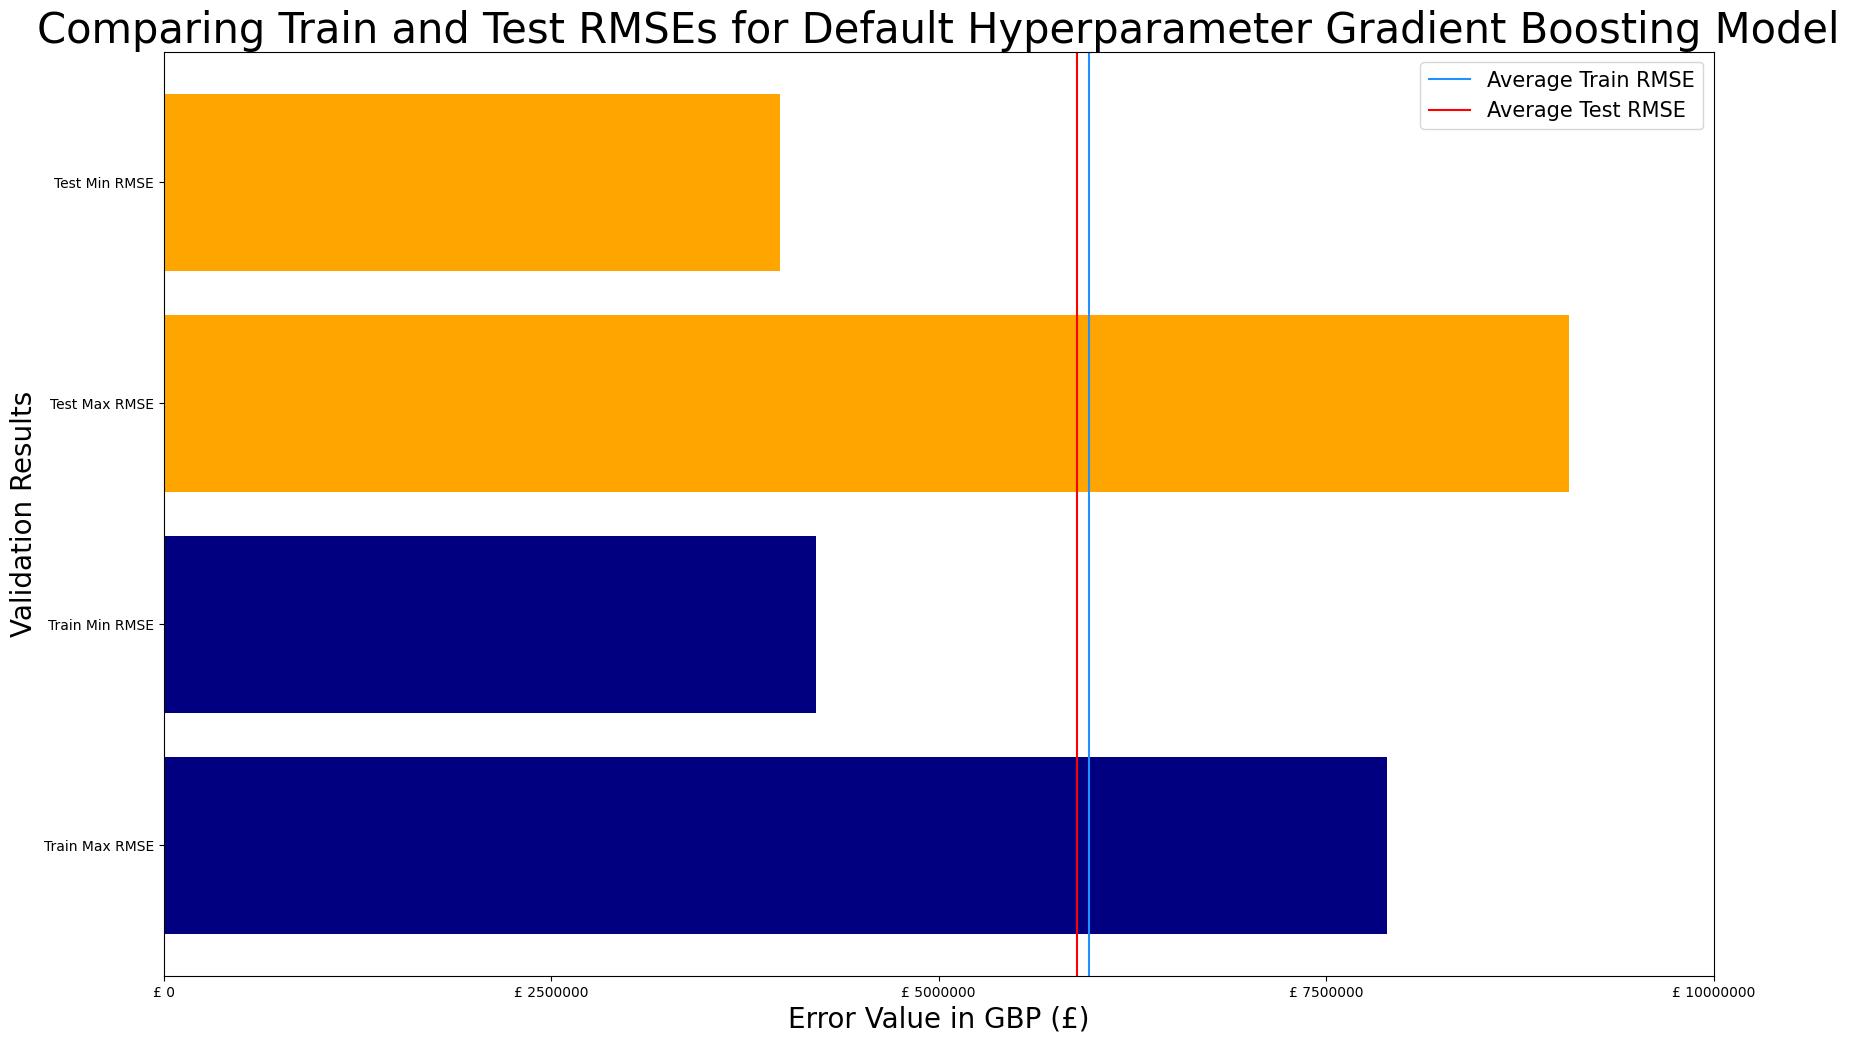

In [71]:
#Robust Scaler
rs= RobustScaler()
X_train = rs.fit_transform(X_train)
X_test = rs.transform(X_test)

pt = PowerTransformer()
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

enet = ElasticNet()
enet.fit(X_train, y_train)

cross_val_train = cross_val_score(enet, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Comparing Train and Test RMSEs for Default Hyperparameter Gradient Boosting Model',fontsize=30)
ax.legend(fontsize=15)

In [72]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,5969042.02,7891962.34,4212308.62
1,Test,5891673.04,9064396.58,3977325.17


In [73]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet.predict(X_train)
y_test_pred = enet.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.16312197578578913
Test R-squared: 0.17063554342447784
Train Adjusted R-squared: 0.14261025950602912
Test Adjusted R-squared: 0.10634372508529011


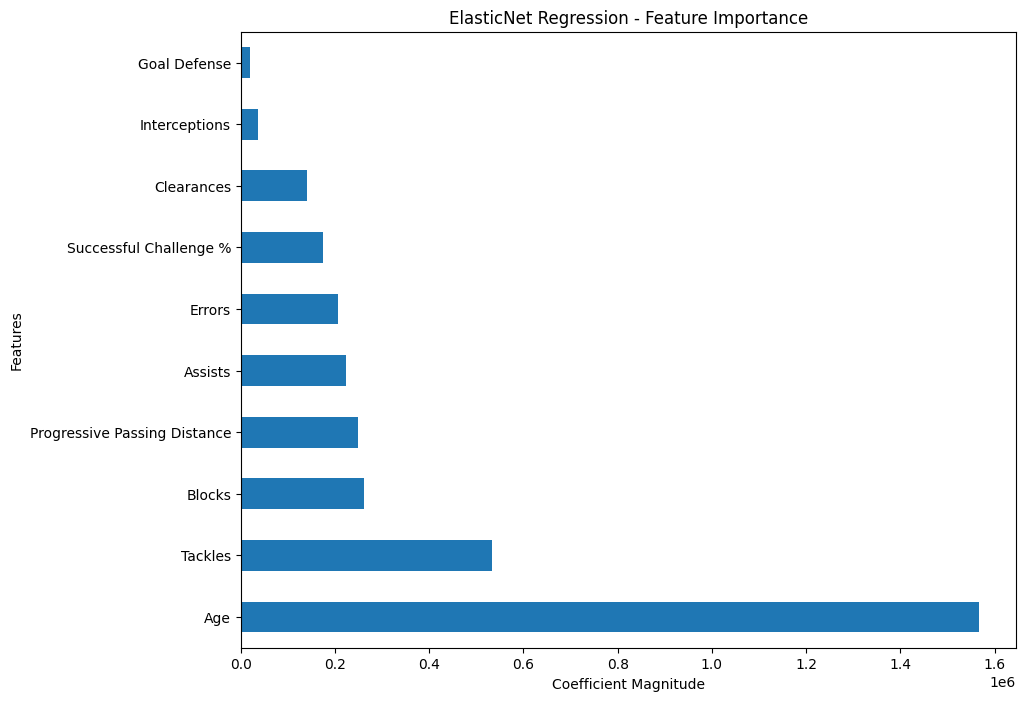

In [74]:
feature_importance = pd.Series(enet.coef_, index=X.columns)
top_features = feature_importance.abs().nlargest(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_features.plot(kind='barh')
ax.set_xlabel('Coefficient Magnitude')
ax.set_ylabel('Features')
ax.set_title('ElasticNet Regression - Feature Importance')

plt.show()

# Tuning

In [75]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
    'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1],
}

grid_search = GridSearchCV(estimator=enet, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=0.1, l1_ratio=0; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.2; total time=   0.0s
[CV] END ............................alpha=0.1,

/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.159e+15, tolerance: 1.267e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/tony/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.257e+15, tolerance: 1.496e+12 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers im

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 20, 50, 100],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.6, 0.8, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [76]:
grid_search.best_params_

{'alpha': 1.0, 'l1_ratio': 0.8}

In [77]:
param_values = list((grid_search.best_params_).values())
param_values

[1.0, 0.8]

In [78]:
enet_Grid = ElasticNet(alpha=param_values[0],
                      l1_ratio=param_values[1])

enet_Grid.fit(X_train,y_train)

ElasticNet(l1_ratio=0.8)

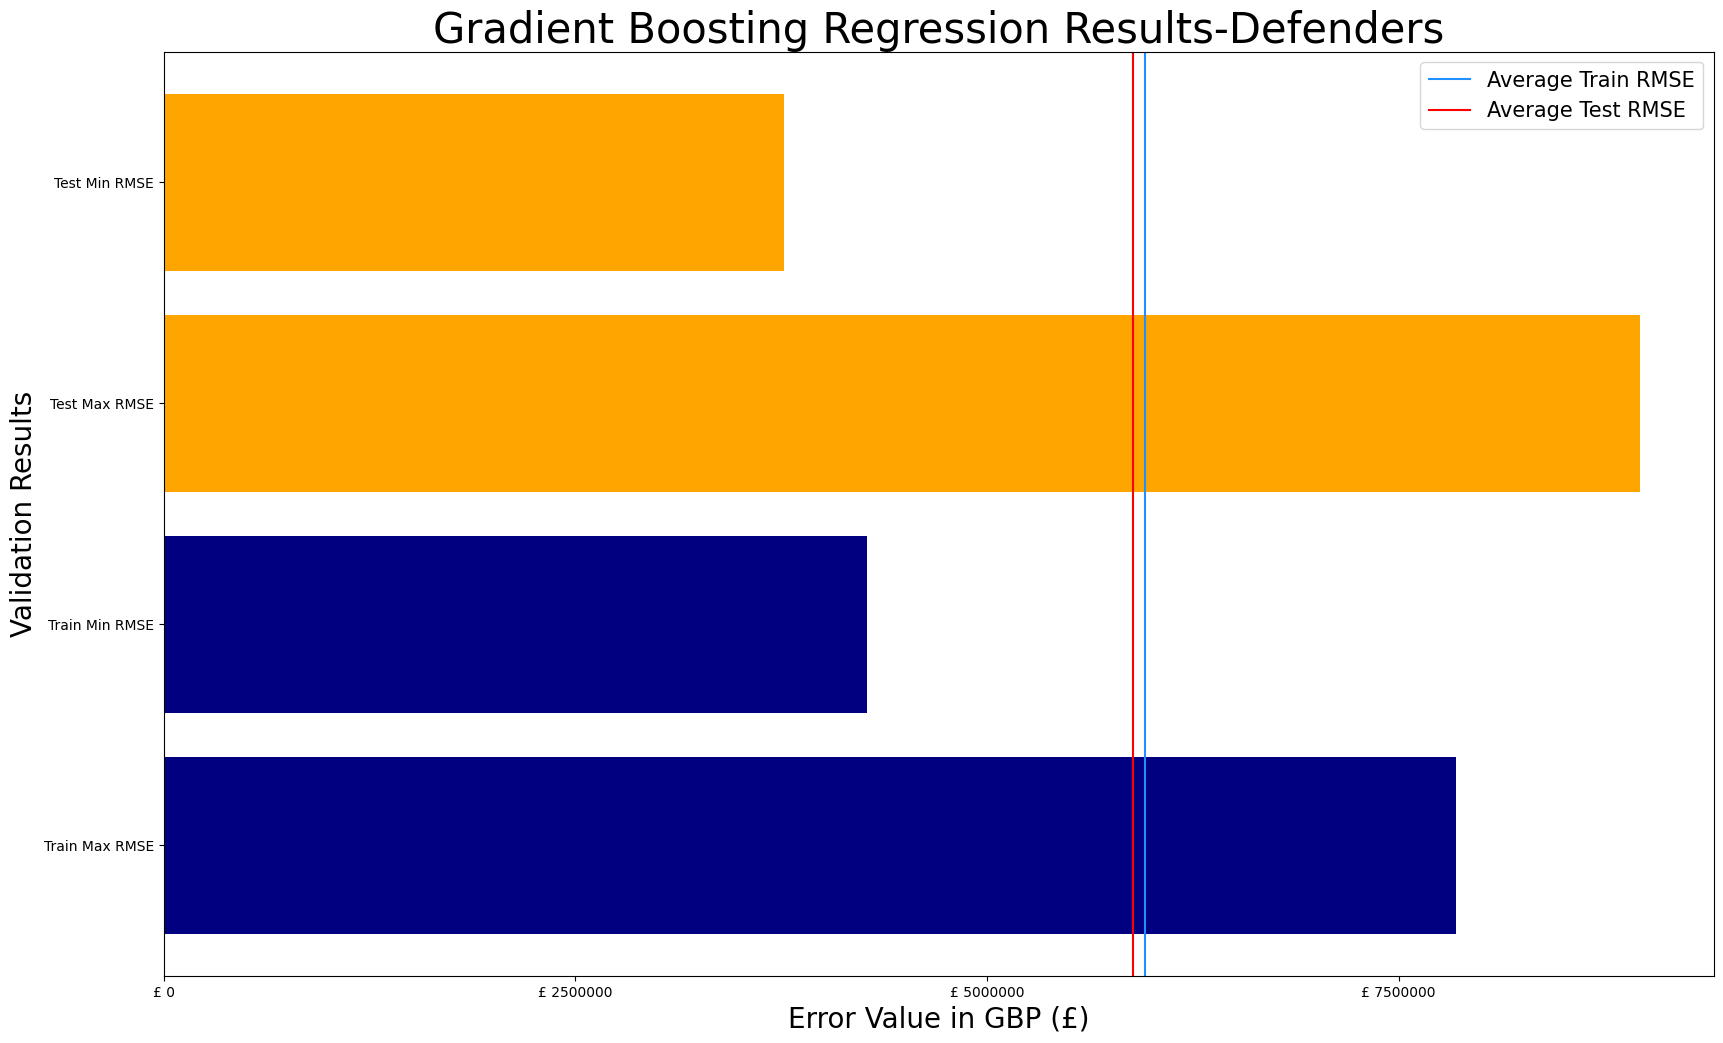

In [79]:
cross_val_train = cross_val_score(enet_Grid, X_train, y_train, scoring="neg_root_mean_squared_error",cv=5)
cross_val_test = cross_val_score(enet_Grid, X_test, y_test, scoring="neg_root_mean_squared_error",cv=5)

#Train Results
cross_val_train_mean = round(-(cross_val_train.mean()),2)
cross_val_train_max = round(-(cross_val_train.min()),2)
cross_val_train_min = round(-(cross_val_train.max()),2)

#Test Results
cross_val_test_mean = round(-(cross_val_test.mean()),2)
cross_val_test_max = round(-(cross_val_test.min()),2)
cross_val_test_min = round(-(cross_val_test.max()),2)

#Creating a Dataframe to display Validation Results
results = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

#Creating a Dataframe to display Validation Results
results_def = pd.DataFrame(columns=['Train/Test','Avg RMSE','Max RMSE','Min RMSE'])
results_def.loc[0] = ['Train',cross_val_train_mean,cross_val_train_max,cross_val_train_min]
results_def.loc[1] = ['Test', cross_val_test_mean, cross_val_test_max, cross_val_test_min]

fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,max([results.iloc[0][2],(round(results.iloc[1][2])+1000000)]),2500000))
y_ticks = [1,2,3,4]
y_labels = ['Train Max RMSE','Train Min RMSE','Test Max RMSE','Test Min RMSE']

train_max_pos = 1
train_max = results.iloc[0][2]
ax.barh(train_max_pos,train_max,color='navy')

train_min_pos = 2
train_min = results.iloc[0][3]
ax.barh(train_min_pos,train_min,color='navy')

test_max_pos = 3
test_max = results.iloc[1][2]
ax.barh(test_max_pos,test_max,color='orange')

test_min_pos = 4
test_min = results.iloc[1][3]
ax.barh(test_min_pos,test_min,color='orange')

ax.axvline(x = results.iloc[0][1],label = 'Average Train RMSE',color='dodgerblue')
ax.axvline(x = results.iloc[1][1],label = 'Average Test RMSE',color='red')

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('Gradient Boosting Regression Results-Defenders',fontsize=30)
ax.legend(fontsize=15)

In [80]:
results_def

,Train/Test,Avg RMSE,Max RMSE,Min RMSE
0,Train,5959544.46,7850977.99,4274612.23
1,Test,5889581.30,8964800.91,3769814.05


In [81]:
from sklearn.metrics import r2_score

# Predict on the training and testing sets
y_train_pred = enet_Grid.predict(X_train)
y_test_pred = enet_Grid.predict(X_test)

# Calculate R-squared
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the number of features
num_features = X_train.shape[1]

# Calculate adjusted R-squared
train_adj_r2 = 1 - (1 - train_r2) * ((len(y_train) - 1) / (len(y_train) - num_features - 1))
test_adj_r2 = 1 - (1 - test_r2) * ((len(y_test) - 1) / (len(y_test) - num_features - 1))

# Print the R-squared and adjusted R-squared values
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Train Adjusted R-squared:", train_adj_r2)
print("Test Adjusted R-squared:", test_adj_r2)

Train R-squared: 0.1750094833999869
Test R-squared: 0.18607393768682146
Train Adjusted R-squared: 0.15478912760096708
Test Adjusted R-squared: 0.12297889409665264


# Graphing All RMSE Together

Text(0.5, 1.0, 'GradientBoostingRegression Average Results')

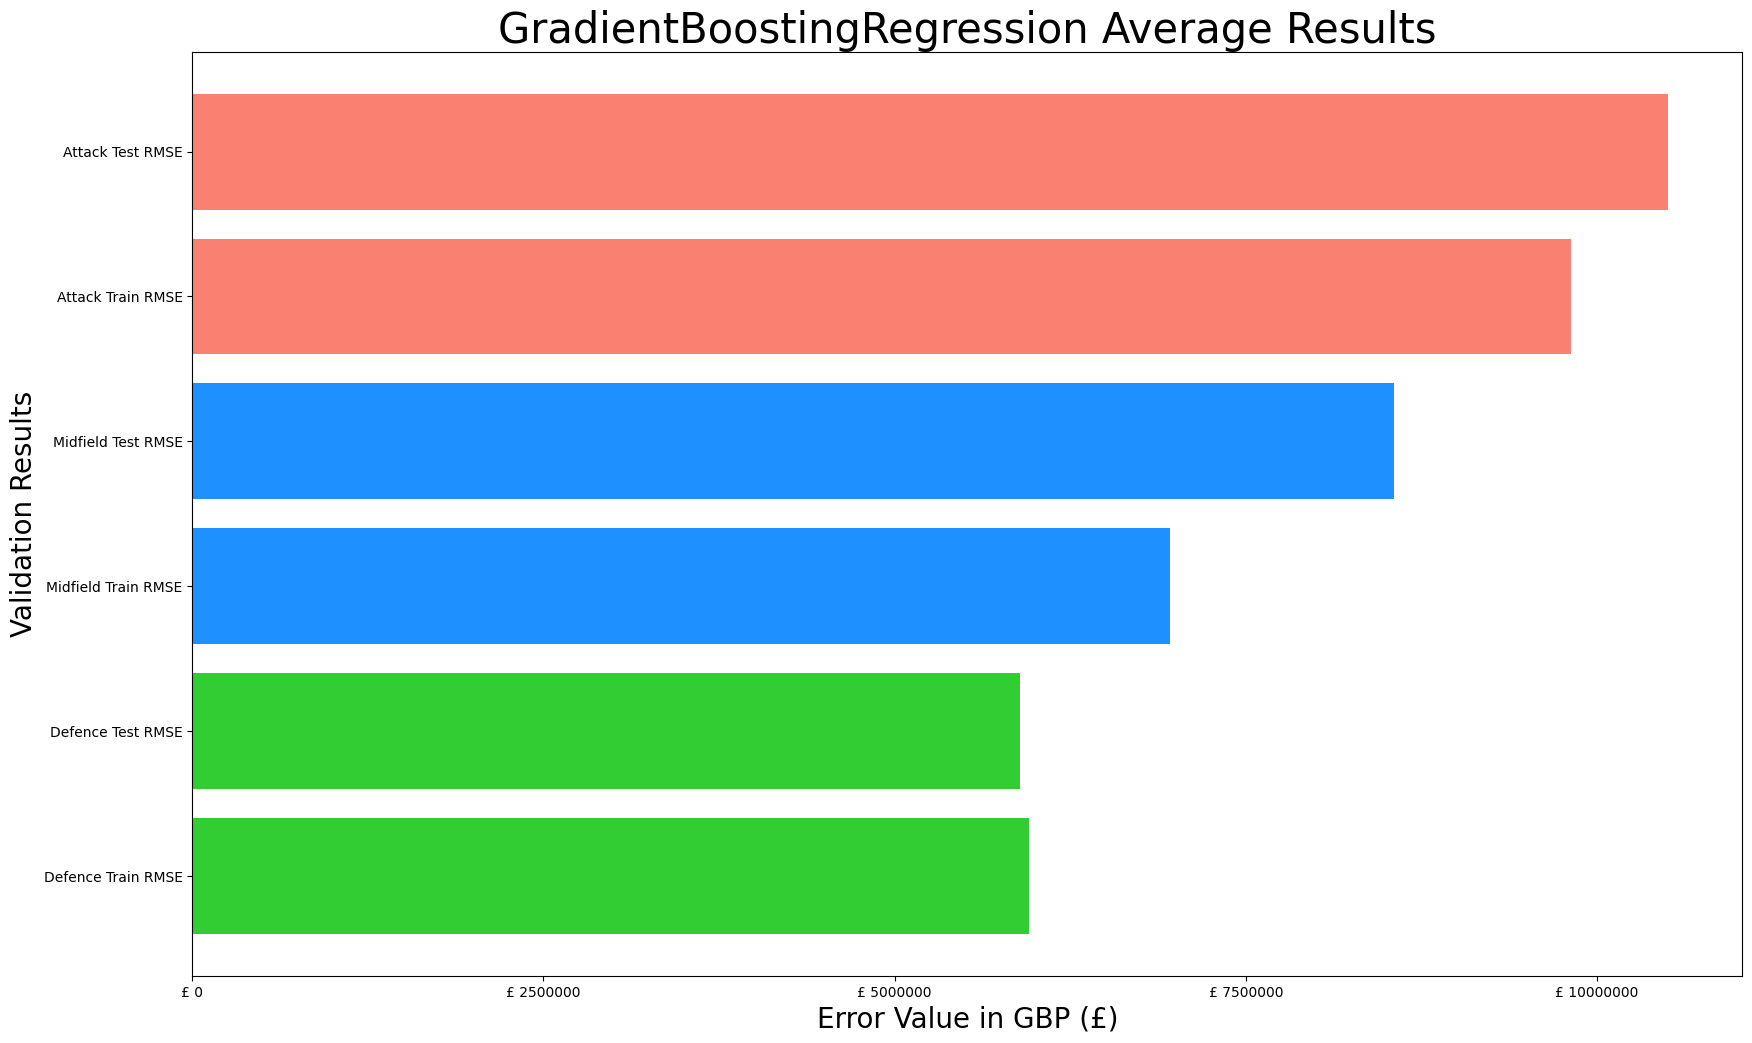

In [82]:
fig, ax = plt.subplots(figsize=(20,12))

x_ticks = list(range(0,int(max([max(results_att['Avg RMSE']),max(results_mid['Avg RMSE']),max(results_def['Avg RMSE'])])+1000000),2500000))
y_ticks = [1,2,3,4,5,6]
y_ticks = [1,2,3,4,5,6]
y_labels = ['Defence Train RMSE','Defence Test RMSE',
            'Midfield Train RMSE','Midfield Test RMSE',
            'Attack Train RMSE','Attack Test RMSE',]

#Attack Results
att_train_pos = 5
att_train = results_att.iloc[0][1]
ax.barh(att_train_pos,att_train,color='salmon')

att_test_pos = 6
att_test = results_att.iloc[1][1]
ax.barh(att_test_pos,att_test,color='salmon')

#Midfield Results
mid_train_pos = 3
mid_train = results_mid.iloc[0][1]
ax.barh(mid_train_pos,mid_train,color='dodgerblue')

mid_test_pos = 4
mid_test = results_mid.iloc[1][1]
ax.barh(mid_test_pos,mid_test,color='dodgerblue')

#Defence Results
def_train_pos = 1
def_train = results_def.iloc[0][1]
ax.barh(def_train_pos,def_train,color='limegreen')

def_test_pos = 2
def_test = results_def.iloc[1][1]
ax.barh(def_test_pos,def_test,color='limegreen')

#Labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels)
ax.set_xticks(x_ticks)
ax.set_xticklabels([f'£ {a}' for a in x_ticks])
ax.set_xlabel('Error Value in GBP (£)',fontsize=20)
ax.set_ylabel('Validation Results',fontsize=20)
ax.set_title('GradientBoostingRegression Average Results',fontsize=30)